In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')
import random
import math
from sklearn.metrics import mean_squared_error

## Importing Data

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'
df = pd.read_excel(url)

In [ ]:
len(df)

768

## Cleaning Data
Drop any rows with any missing values

In [ ]:
df = df.dropna(axis=0, how='any')

In [ ]:
len(df)

768

Appears the data is clean, no changes were made

## Basic Data Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## Preparing Data
Using an 80/20 train/test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop("Y2", axis=1).drop("Y1", axis=1)
y = df["Y1"]

In [ ]:
# The test_size=0.2 means the test size will be 20% of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Analytical Linear Regression

In [ ]:
N=len(X_test)

class AnalyticalLinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass
    
    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1
        self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference
        return self
    
    def predict(self, x):
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w                             #predict the y values
        return yh
    
    def showW(self):
        print("w: \n", self.w)
        return self.w

In [ ]:
model = AnalyticalLinearRegression()

In [ ]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def root_mean_sq_error(y_true, y_predicted):
    return np.sqrt(np.mean((y_true - y_predicted)**2))

## Predicting Y1

In [ ]:
y = df["Y1"]

In [ ]:
test_predictions = model.fit(X_train, y_train).predict(X_test)
model.showW()

w: 
 [-6.21494664e+01 -5.87405669e-02  3.55869915e-02 -4.71637792e-02
  4.24160843e+00 -8.78039189e-02  2.05338427e+01  2.21060971e-01
  7.88311888e+01]


array([-6.21494664e+01, -5.87405669e-02,  3.55869915e-02, -4.71637792e-02,
        4.24160843e+00, -8.78039189e-02,  2.05338427e+01,  2.21060971e-01,
        7.88311888e+01])

In [ ]:
RMSE = root_mean_sq_error(y_test, test_predictions)
print(RMSE)
print(y_test.mean())

2.6009198090925048
20.757662337662342


In [ ]:
test_res = y_test - test_predictions

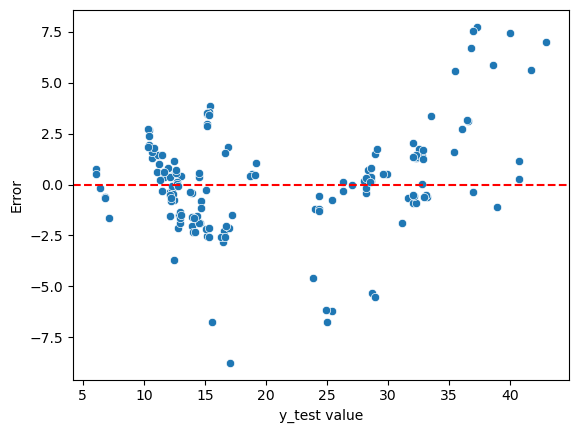

In [ ]:
sns.scatterplot(x=y_test, y=test_res)
plt.xlabel("y_test value")
plt.ylabel("Error")
plt.axhline(y = 0, color='r', linestyle='--')

Text(13.819444444444445, 0.5, 'Error count')

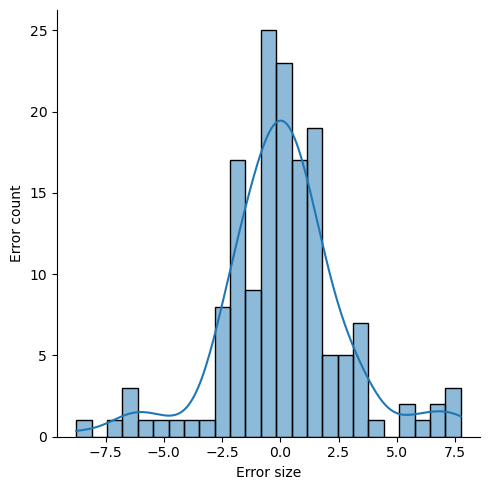

In [ ]:
sns.displot(test_res,bins=25,kde=True)
plt.xlabel("Error size")
plt.ylabel("Error count")

### Feature Analysis

In [ ]:
wtemp = model.showW()
for i in wtemp:
    print(round(i,3))

w: 
 [-6.42114217e+01 -6.08728935e-02  3.48946276e-02 -4.78837606e-02
  4.27984872e+00 -4.59320360e-02  1.95642485e+01  1.79282788e-01
  8.22247407e+01]
-64.211
-0.061
0.035
-0.048
4.28
-0.046
19.564
0.179
82.225


As we can see the X1 and X7 have the most significance when predicting Y1 and X5 having a minor impact, the other features lack any significance as their weights are much smaller.

With regularization, the weights of columns like X2, X3, X4, X6 and X8 may even be brought down to 0.

## Sampling sizes of training data

In [ ]:
training_size_percent = 10

x_axis = []
y_axis_test_RMSE = []
y_axis_train_RMSE = []

while training_size_percent <= 80:
    
    total_train_RMSE = 0
    total_test_RMSE = 0
    numTests = 1000
    
    for i in range (0, numTests):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=training_size_percent/100, random_state=random.randint(0,1000))
        
        N=len(X_train)
        #train_predicitons
        train_predictions = model.fit(X_train, y_train).predict(X_train)
        train_RMSE = root_mean_sq_error(y_train, train_predictions)
        total_train_RMSE = total_train_RMSE + train_RMSE
        
        N=len(X_test)
        # Test predictions
        test_predictions = model.fit(X_train, y_train).predict(X_test)
        test_RMSE = root_mean_sq_error(y_test, test_predictions)
        total_test_RMSE = total_test_RMSE + test_RMSE
        
    average_train_RMSE = total_train_RMSE / numTests
    average_test_RMSE = total_test_RMSE / numTests
    
    x_axis.append(training_size_percent)
    y_axis_train_RMSE.append(average_train_RMSE)
    y_axis_test_RMSE.append(average_test_RMSE)

    print("Training data size: ", training_size_percent, "% - RMSE: ", average_test_RMSE)
    training_size_percent = training_size_percent + 10
    
    

Training data size:  10 % - RMSE:  2.9572055467510405
Training data size:  20 % - RMSE:  2.954804520333147
Training data size:  30 % - RMSE:  2.961178713276623
Training data size:  40 % - RMSE:  2.960508421780149
Training data size:  50 % - RMSE:  2.9656022376859004
Training data size:  60 % - RMSE:  2.97407196057566
Training data size:  70 % - RMSE:  2.982895756074232
Training data size:  80 % - RMSE:  3.0113241288309966


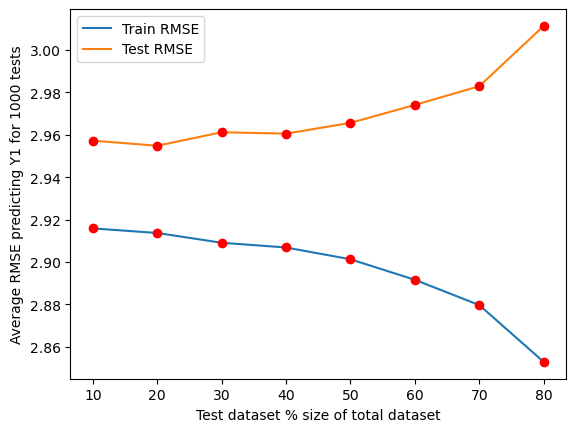

In [ ]:
plt.plot(x_axis,y_axis_train_RMSE, label='Train RMSE')
plt.plot(x_axis,y_axis_train_RMSE,'or')
plt.plot(x_axis,y_axis_test_RMSE, label='Test RMSE')
plt.plot(x_axis,y_axis_test_RMSE,'or')
plt.xlabel("Test dataset % size of total dataset")
plt.ylabel("Average RMSE predicting Y1 for 1000 tests")
plt.legend()
plt.show()

As we can see there is and inverse relationship between the size of the train/test split data and the divergence in the performance between the two data sets

## Predicting Y2

In [ ]:
y = df["Y2"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
N=len(X_test)
test_predictions = model.fit(X_train, y_train).predict(X_test)
wtemp = model.showW()
for i in wtemp:
    print(round(i,3))

w: 
 [-6.73977803e+01 -6.17002841e-02  2.23676218e-02 -4.20339530e-02
  4.33285614e+00  5.37111776e-02  1.53450106e+01  4.22270194e-02
  9.11505877e+01]
-67.398
-0.062
0.022
-0.042
4.333
0.054
15.345
0.042
91.151


In [ ]:
RMSE = root_mean_sq_error(y_test, test_predictions)
print(RMSE)

2.7579028260240683


In [ ]:
test_res = y_test - test_predictions

Text(0, 0.5, 'Error')

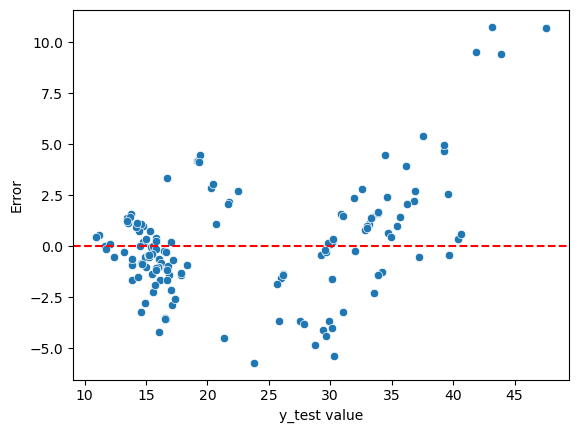

In [ ]:
sns.scatterplot(x=y_test, y=test_res)
plt.axhline(y = 0, color='r', linestyle='--')
plt.xlabel("y_test value")
plt.ylabel("Error")

Text(13.819444444444445, 0.5, 'Error count')

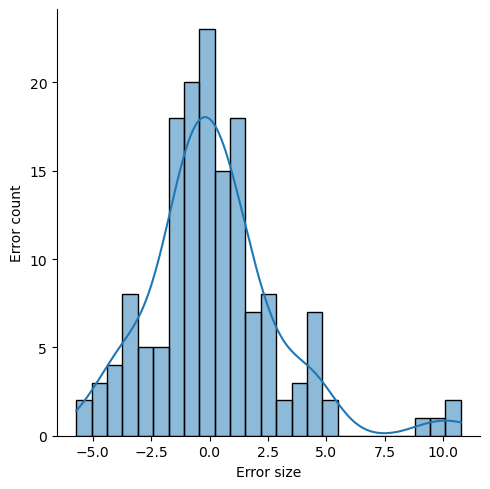

In [ ]:
sns.displot(test_res,bins=25,kde=True)
plt.xlabel("Error size")
plt.ylabel("Error count")

### Feature Analysis

In [ ]:
model.showW()

w: 
 [-6.73977803e+01 -6.17002841e-02  2.23676218e-02 -4.20339530e-02
  4.33285614e+00  5.37111776e-02  1.53450106e+01  4.22270194e-02
  9.11505877e+01]


array([-6.73977803e+01, -6.17002841e-02,  2.23676218e-02, -4.20339530e-02,
        4.33285614e+00,  5.37111776e-02,  1.53450106e+01,  4.22270194e-02,
        9.11505877e+01])

As we can see the X1 and X7 have the most significance when predicting Y1 and X5 having a minor impact, the other features lack any significance as their weights are much smaller.

With regularization, the weights of columns like X2, X3, X4, X6 and X8 may even be brought down to 0.

## Sampling sizes of training data

In [ ]:
training_size_percent = 10

x_axis = []
y_axis_test_RMSE = []
y_axis_train_RMSE = []

while training_size_percent <= 80:
    
    total_train_RMSE = 0
    total_test_RMSE = 0
    numTests = 1000
    
    for i in range (0, numTests):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=training_size_percent/100, random_state=random.randint(0,1000))
        
        N=len(X_train)
        #train_predicitons
        train_predictions = model.fit(X_train, y_train).predict(X_train)
        train_RMSE = root_mean_sq_error(y_train, train_predictions)
        total_train_RMSE = total_train_RMSE + train_RMSE
        
        N=len(X_test)
        # Test predictions
        test_predictions = model.fit(X_train, y_train).predict(X_test)
        test_RMSE = root_mean_sq_error(y_test, test_predictions)
        total_test_RMSE = total_test_RMSE + test_RMSE
        
    average_train_RMSE = total_train_RMSE / numTests
    average_test_RMSE = total_test_RMSE / numTests
    
    x_axis.append(training_size_percent)
    y_axis_train_RMSE.append(average_train_RMSE)
    y_axis_test_RMSE.append(average_test_RMSE)

    print("Training data size: ", training_size_percent, "% - RMSE: ", average_test_RMSE)
    training_size_percent = training_size_percent + 10
    

Training data size:  10 % - RMSE:  3.18198526980832
Training data size:  20 % - RMSE:  3.1979808698139265
Training data size:  30 % - RMSE:  3.225168450702517
Training data size:  40 % - RMSE:  3.222939483702932
Training data size:  50 % - RMSE:  3.229995448014621
Training data size:  60 % - RMSE:  3.2444083637489785
Training data size:  70 % - RMSE:  3.2543248800564935
Training data size:  80 % - RMSE:  3.2793544275943227


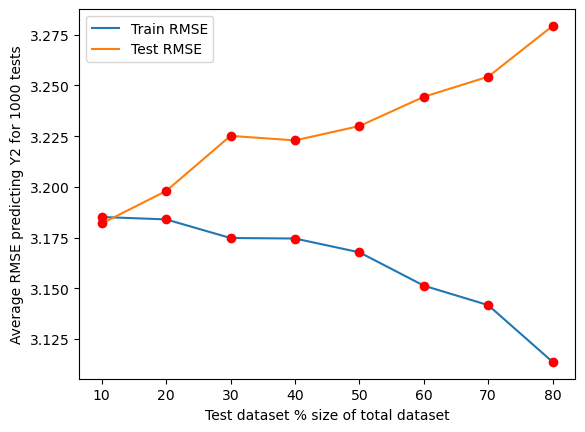

In [ ]:
plt.plot(x_axis,y_axis_train_RMSE, label='Train RMSE')
plt.plot(x_axis,y_axis_train_RMSE,'or')
plt.plot(x_axis,y_axis_test_RMSE, label='Test RMSE')
plt.plot(x_axis,y_axis_test_RMSE,'or')
plt.xlabel("Test dataset % size of total dataset")
plt.ylabel("Average RMSE predicting Y2 for 1000 tests")
plt.legend()
plt.show()

As we can see there is and inverse relationship between the size of the train/test split data and the divergence in the performance between the two data sets

# Stochastic Mini Batch Gradient Descent

In [ ]:
class MiniBatchGradientDescent:
    
    def __init__(self, learning_rate=.0000001,max_iters=100, epsilon=1e-8, batch_size=32, record_history=False):
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.max_iters = max_iters
        self.batch_size = batch_size
        self.record_history = record_history
        if record_history:
            self.w_history = []
            self.cost_history = []

 
        
    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t=1
        m = x.shape[0]
        randomized_indices = np.arange(m)
        np.random.shuffle(randomized_indices)
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            for i in range(0, m, self.batch_size):
              indices = randomized_indices[i: i + self.batch_size]
              indices = indices[indices < m]
              x_batch = x[indices]
              y_batch = y[indices]
              grad = gradient_fn(x_batch, y_batch, w)
              w = w - self.learning_rate * grad
            if self.record_history:
                self.w_history.append(w)
                cost = math.sqrt(mean_squared_error(y, x @ w))
                self.cost_history.append(cost)
                t += 1

        return w

#Linear Regression with Optimizer

In [ ]:
class LinearRegressionGradient:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias

    def fit(self, x, y, optimizer):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        def gradient(x, y, w):                          # define the gradient function
            yh =  x @ w 
            N, D = x.shape
            grad = .5*np.dot(yh - y, x)/N
            return grad
        w0 = np.zeros(D)                                # initialize the weights to 0
        self.w = optimizer.run(gradient, x, y, w0)      # run the optimizer to get the optimal weights
        return self
    
    def predict(self, x):
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w
        return yh

In [ ]:
optimizer = MiniBatchGradientDescent(batch_size = 64, record_history=True)
modelLinear = LinearRegressionGradient()

In [ ]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

### Plotting the convergence speed of stochastic mini batch with different batch sizes.

Batch sizes are 8,12,32,64,128, and fully batch

In [ ]:
def plot_convergence_speed(model_histories, batch_sizes):
    plt.figure(figsize=(10,6))
    for i, history in enumerate(model_histories):
        plt.plot(range(len(history)), history, label=f"Batch size: {batch_sizes[i]}")
    plt.ylabel("Cost")
    plt.xlabel("Number of Iterations")
    plt.legend()
    plt.title("Convergence Speed")
    plt.show()

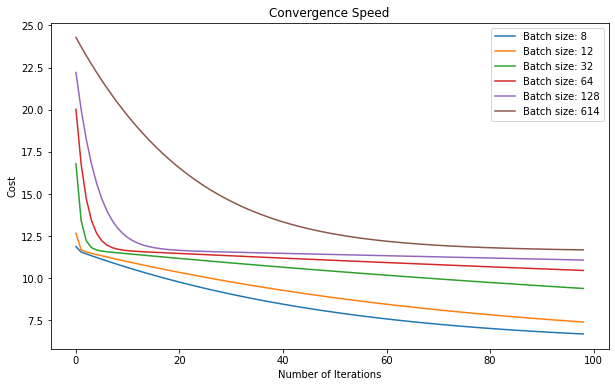

In [ ]:
batch_sizes = [8,12,32,64,128,X_train.shape[0]]
model_histories = []

for batch_size in batch_sizes:
    optimizer = MiniBatchGradientDescent(batch_size=batch_size, record_history=True)
    model = LinearRegressionGradient(add_bias=True)
    model.fit(X_train, y_train, optimizer)
    model_histories.append(optimizer.cost_history)
plot_convergence_speed(model_histories, batch_sizes)

### Ploting the performance of sthochastic mini batch with different batch sizes. 

(614, 8)


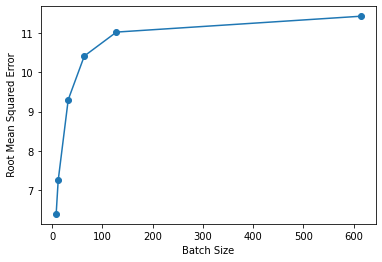

[6.393424481828105, 7.2449497270766186, 9.30262178978423, 10.414369930677289, 11.024367741433696, 11.427856182723556]
[8, 12, 32, 64, 128, 614]


In [ ]:
rmse =[]

batch_sizes = [8,12,32,64,128, X_train.shape[0]]
print(X_train.shape)
for batch_size in batch_sizes:
  optimizer = MiniBatchGradientDescent(batch_size=batch_size, record_history=True)
  model = LinearRegressionGradient()
  pred = model.fit(X_train, y_train, optimizer)
  test_predictions=pred.predict(X_test)
  rmse.append(math.sqrt(mean_squared_error(y_test, test_predictions)))

  # Plotting the performance of different batch sizes
plt.plot(batch_sizes, rmse, '-o')
plt.xlabel('Batch Size')
plt.ylabel(' Root Mean Squared Error')
plt.show()
print(rmse)
print(batch_sizes)

### Best overall performance of sthochastic mini batch with batch size=5, and max_iters= 10000

In [ ]:
optimizer = MiniBatchGradientDescent(batch_size=5, max_iters=10000 ,record_history=True)
model = LinearRegressionGradient()
pred = model.fit(X_train, y_train, optimizer)
test_predictions=pred.predict(X_test)
print(math.sqrt(mean_squared_error(y_test, test_predictions)))

Above unlike other experiments for sthocastic mini batch we used a higher max iteration in order to get a better performance in order to compare sthocastic mini batch with analytical linear regression. Even though overall performance increased for the optimizer computing time significantly increased as well.

### Testing Sthochastic mini batch with different learning rates

22.394229773870123
18.373887352929273
11.412739182950162
10.418368910288192
6.026323019638267


Text(0, 0.5, 'RMSE')

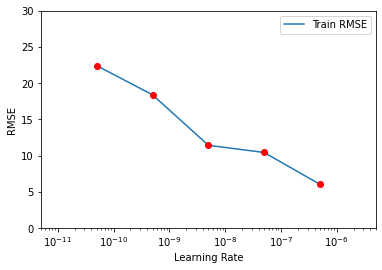

In [ ]:
learning_rates = [0.00000000005, 0.0000000005, 0.000000005, 0.00000005, 0.0000005]
learning_rates_RMSE = []

for i, lr in enumerate(learning_rates):
    optimizer = MiniBatchGradientDescent(learning_rate=lr, max_iters=100, record_history=True,)
    model = LinearRegressionGradient()
    N = len(X_test)
    test_predictions = model.fit(X_train, y_train, optimizer).predict(X_test)
    RMSE = math.sqrt(mean_squared_error(y_test, test_predictions))
    print(RMSE)
    learning_rates_RMSE.append(RMSE)


plt.plot(learning_rates, learning_rates_RMSE, label='Train RMSE')
plt.plot(learning_rates, learning_rates_RMSE,'or')
plt.ylim([0, 30])
plt.xscale('log')
plt.legend()
plt.xlim(0.000000000005, 0.000005)
plt.xlabel("Learning Rate")
plt.ylabel("RMSE")

# Sthochastic mini batch gradient descent with momentum

we used running averages of gradients

In [ ]:
class MiniBatchGradientDescentWithMomentum:
    def __init__(self, learning_rate=.0000001, max_iters=100, epsilon=1e-8, batch_size=32, record_history=False, beta=0.9):
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.max_iters = max_iters
        self.batch_size = batch_size
        self.record_history = record_history
        self.beta = beta
        if record_history:
            self.w_history = []
            self.cost_history = []

    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 0
        m = x.shape[0]
        v = 0
        randomized_indices = np.arange(m)
        np.random.shuffle(randomized_indices)
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            for i in range(0, m, self.batch_size):
                indices = randomized_indices[i: i + self.batch_size]
                indices = indices[indices < m]
                x_batch = x[indices]
                y_batch = y[indices]
                grad = gradient_fn(x_batch, y_batch, w)
                v = self.beta * v + (1 - self.beta) * grad
                w = w - self.learning_rate * v
            if self.record_history:
                self.w_history.append(w)
                cost = math.sqrt(mean_squared_error(y, x @ w))
                self.cost_history.append(cost)
            t += 1

        return w


## Compare the performance of Mini batch with momentum and Mini batch without momentum

### Test both optimizer on different batch sizes

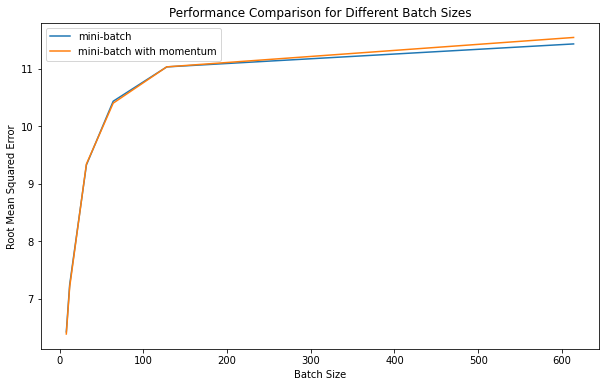

In [ ]:
batch_sizes = [8,12,32,64,128,X_train.shape[0]]

mse_mb = []
mse_mb_momentum = []

for batch_size in batch_sizes:
    optimizer = MiniBatchGradientDescent(batch_size=batch_size, record_history=True)
    optimizer_momentum = MiniBatchGradientDescentWithMomentum(batch_size=batch_size, record_history=True)
    model = LinearRegressionGradient()
    
    test_pred = model.fit(X_train, y_train , optimizer).predict(X_test)
    test_pred_momentum = model.fit(X_train, y_train, optimizer_momentum).predict(X_test)
    
    mse_mb.append(math.sqrt(mean_squared_error(y_test, test_pred )))
    mse_mb_momentum.append(math.sqrt(mean_squared_error(y_test, test_pred_momentum)))

# Plot the results
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(batch_sizes, mse_mb, label="mini-batch")
ax.plot(batch_sizes, mse_mb_momentum, label="mini-batch with momentum")
ax.set_xlabel("Batch Size")
ax.set_ylabel("Root Mean Squared Error")
ax.legend()
ax.set_title("Performance Comparison for Different Batch Sizes")
plt.show()

Momentum did not improve performance for our dataset, it even degraded performance for larger batch sizes. For larger dataset momentum can be more beneficial.

### Test both optimizer on different learning rates

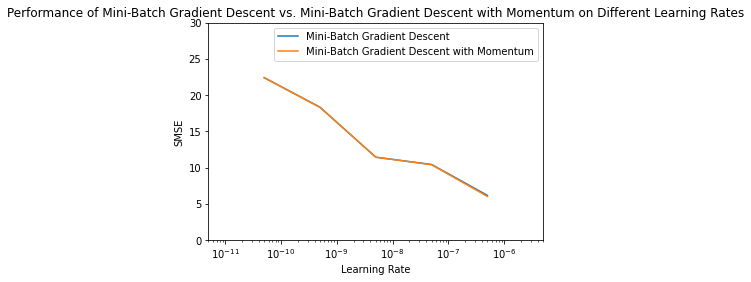

In [ ]:
learning_rates = [0.00000000005, 0.0000000005, 0.000000005, 0.00000005, 0.0000005]
mse_mb = []
mse_mb_momentum = []

for i, lr in enumerate(learning_rates):
    optimizer = MiniBatchGradientDescent(learning_rate =lr, batch_size=32, record_history=True)
    optimizer_momentum = MiniBatchGradientDescentWithMomentum(learning_rate =lr,batch_size=32, record_history=True)
    model = LinearRegressionGradient()
    
    test_pred = model.fit(X_train, y_train , optimizer).predict(X_test)
    test_pred_momentum = model.fit(X_train, y_train, optimizer_momentum).predict(X_test)
    
    mse_mb.append(math.sqrt(mean_squared_error(y_test, test_pred )))
    mse_mb_momentum.append(math.sqrt(mean_squared_error(y_test, test_pred_momentum)))


plt.plot(learning_rates, mse_mb, label='Mini-Batch Gradient Descent')
plt.plot(learning_rates, mse_mb_momentum, label='Mini-Batch Gradient Descent with Momentum')
plt.ylim([0, 30])
plt.xscale('log')
plt.legend()
plt.xlim(0.000000000005, 0.000005)
plt.xlabel("Learning Rate")
plt.ylabel("SMSE")
plt.title("Performance of Mini-Batch Gradient Descent vs. Mini-Batch Gradient Descent with Momentum on Different Learning Rates")
plt.show()

In this case both optimizers are performing exactly same so the plot has only one line in it. 